# Data Wrangling

## WeRateDogs Project - To Wrangle and Analyze Twitters Data
### By Arham Ansari

## Introduction
The goal of this project is to wrangle the WeRateDogs Twitter data to create interesting and trustworthy analyses and visualizations. The challenge lies in the fact that the Twitter archive is great, but it only contains very basic tweet information that comes in JSON format. For a successful project, I needed to gather, asses and clean the Twitter data for a worthy analysis and visualization.


In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import tweepy
from tweepy import OAuthHandler
import json
import csv
import sys
import os
import time

### Gathering Data

In [2]:
#reading file provided
df = pd.read_csv("twitter-archive-enhanced.csv")
df.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [3]:
#Programatically download the dog image prediction file from udacity server

import requests
import os


# Save to a file
folder_name = 'image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

with open(os.path.join(folder_name,
                      url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)

In [4]:
#open tsv file
images = pd.read_table('image_predictions/image-predictions.tsv',
                       sep='\t')

In [5]:
images.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Query the Twiiter API  for each tweets JSON data using Tweepy Library and store each tweets entire set of JSON data in file

In [6]:
# authentication pieces
consumer_key = 'hoWO62DXUDDxehczdh9HMvhCN'
consumer_secret = 'CdUmDxMKfvdi1mqh54fUJydqVon4m8QDbuzh470E1nLgO8qhb2'
access_token = '829426571584929807-Xb6VN37Se2PiigqarVS5Lbtg0H4DuVK'
access_secret = 'ysQxfivu6gCiLDlIHdfORMjajwLNA3bLoKLKFwYQkhYSD'


auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth_handler=auth, 
                 wait_on_rate_limit=True, 
                 wait_on_rate_limit_notify=True)


In [7]:
# Query Twiitter using tweet_id information from dataframe df

tweet_ids = list(df.tweet_id)

tweet_data = {}
for tweet in tweet_ids:
    try:
        tweet_status = api.get_status(tweet,
                                      wait_on_rate_limit=True, 
                                      wait_on_rate_limit_notify=True)
        tweet_data[str(tweet)] = tweet_status._json
    except: 
        print("Error for: " + str(tweet))

Error for: 888202515573088257
Error for: 873697596434513921
Error for: 872668790621863937
Error for: 869988702071779329
Error for: 866816280283807744
Error for: 861769973181624320
Error for: 845459076796616705
Error for: 842892208864923648
Error for: 837012587749474308
Error for: 827228250799742977
Error for: 812747805718642688
Error for: 802247111496568832
Error for: 775096608509886464
Error for: 770743923962707968
Rate limit reached. Sleeping for: 731
Error for: 754011816964026368
Error for: 680055455951884288
Rate limit reached. Sleeping for: 729


In [8]:
import json

with open('tweet_json.txt', 'w') as outfile:  
    json.dump(tweet_data, outfile, 
              sort_keys = True,
              indent=4,
              ensure_ascii = False)

In [9]:
tweet_df = pd.read_json('tweet_json.txt',orient='index')

### Assessing Data


In [10]:
#Assessing dataframe
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [11]:
images.head()
images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [12]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2340 entries, 1991-02-08 13:48:08.022790149 to 1998-04-12 22:37:23.555336193
Data columns (total 30 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2340 non-null datetime64[ns]
entities                         2340 non-null object
extended_entities                1822 non-null object
favorite_count                   2340 non-null int64
favorited                        2340 non-null int64
geo                              0 non-null float64
id                               2340 non-null int64
id_str                           2340 non-null int64
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null float64
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 non-null float64
is_quote_status                  23

In [13]:
#Assesing of tweet_df
tweet_df.head()

,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,id,id_str,...,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,truncated,user
1991-02-08 13:48:08.022790149,NaN,NaN,2015-11-15 22:32:08,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/BL...,2531,0,NaN,666020888022790144,666020888022790144,...,NaN,NaN,NaN,500,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 16:08:05.002620928,NaN,NaN,2015-11-15 23:05:30,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/r7...,126,0,NaN,666029285002620928,666029285002620928,...,NaN,NaN,NaN,47,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 17:16:52.701032449,NaN,NaN,2015-11-15 23:21:54,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/y6...,123,0,NaN,666033412701032448,666033412701032448,...,NaN,NaN,NaN,43,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 20:17:06.329800704,NaN,NaN,2015-11-16 00:04:52,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/DW...,293,0,NaN,666044226329800704,666044226329800704,...,NaN,NaN,NaN,139,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,0,"{'contributors_enabled': False, 'created_at': ..."
1991-02-08 21:40:48.165822465,NaN,NaN,2015-11-16 00:24:50,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/4B...,106,0,NaN,666049248165822464,666049248165822464,...,NaN,NaN,NaN,42,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,0,"{'contributors_enabled': False, 'created_at': ..."


In [14]:
tweet_df.tail()

,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,id,id_str,...,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,truncated,user
1998-03-31 06:59:18.926688256,NaN,NaN,2017-07-29 16:00:24,"{'hashtags': [], 'symbols': [], 'urls': [{'dis...",NaN,39503,0,NaN,891327558926688256,891327558926688256,...,NaN,NaN,NaN,9147,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,1,"{'contributors_enabled': False, 'created_at': ..."
1998-04-04 11:32:37.279858688,NaN,NaN,2017-07-30 15:58:51,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/tD...,41322,0,NaN,891689557279858688,891689557279858688,...,NaN,NaN,NaN,8442,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,0,"{'contributors_enabled': False, 'created_at': ..."
1998-04-05 22:26:21.378084864,NaN,NaN,2017-07-31 00:18:03,"{'hashtags': [], 'symbols': [], 'urls': [{'dis...",NaN,24558,0,NaN,891815181378084864,891815181378084864,...,NaN,NaN,NaN,4058,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,1,"{'contributors_enabled': False, 'created_at': ..."
1998-04-10 03:03:41.306343426,NaN,NaN,2017-08-01 00:17:27,"{'hashtags': [], 'symbols': [], 'urls': [{'dis...",NaN,32613,0,NaN,892177421306343424,892177421306343424,...,NaN,NaN,NaN,6130,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,1,"{'contributors_enabled': False, 'created_at': ..."
1998-04-12 22:37:23.555336193,NaN,NaN,2017-08-01 16:23:56,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/Mg...,37985,0,NaN,892420643555336192,892420643555336192,...,NaN,NaN,NaN,8302,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,0,"{'contributors_enabled': False, 'created_at': ..."


In [15]:
tweet_df.sample()

,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,id,id_str,...,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,truncated,user
1995-11-07 09:26:32.542261248,NaN,NaN,2017-01-02 01:48:06,"{'hashtags': [], 'media': [{'display_url': 'pi...",{'media': [{'display_url': 'pic.twitter.com/gd...,10468,0,NaN,815736392542261248,815736392542261248,...,NaN,NaN,NaN,2481,0,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Akumi. It's his birthday. He received ...,0,"{'contributors_enabled': False, 'created_at': ..."


In [16]:
df.sample()
df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [17]:
df.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

## Quality Issues

Need to remove rows that have been retweeted, therby they are not original tweets

### A tweet that has been retweeted

The relevant field is retweet_count. This field provides the number of times this tweet was retweeted.This number may be vary over time, as additional people retweet the tweet.

### A tweet that is retweet

Two fields are signinficant here:
1) retweet_status, contains the source of the tweet through which it has been retweeted 
2) retweet_count is the count of the retweet of the source tweet.

I will keep all rows in the retweeted_status column that have a value and delete it from the dataframe. This will remove tweets that are a retweet from the dataframe.

### Dataframe Table:
- Exclude column from dataset that are not needed for our analysis
- 181 records have a retweeted_status_id theses will need to be excluded from the dataset
- Name of the various dogs are not proper

### Image Prediction Table:
- p1 column: capitalise first letter of each word to make consistent
- p2 column: capitalise first letter of each word to make consistent
- p3 column: capitalise first leter of each word to make consisitent
- Remove the( _ ) between the word to make it consistent 

### tweet_df Table:
- 167 records have a retweeted_status that will need to be excluded
- Rename the "id" column with "tweet_id" to match the other 2 tables

## Tidiness issue:

Structure of the data is not proper 
- There are 3 dataframes, only 1 dataframe should suffice to incorporate the data we need.
- There are 4 columns for doggo, floffer, pupper, and puppo in the "twitter_df" but this is same categorical data that would be better in only 1 column.

### We can perform inner join on all the 3 tables



## Cleaning Data

In [18]:
#Copy dataset before cleaning
df_clean=df.copy()
images_clean=images.copy()
tweet_df_clean=tweet_df.copy()

### df_clean 

### Define

Missing data: Replace the the faulty name with correct names

### Code


In [19]:
df_clean.name.value_counts()

None        745
a            55
Charlie      12
Lucy         11
Cooper       11
Oliver       11
Tucker       10
Penny        10
Lola         10
Bo            9
Winston       9
the           8
Sadie         8
Bailey        7
Toby          7
Daisy         7
an            7
Buddy         7
Oscar         6
Scout         6
Bella         6
Jax           6
Jack          6
Koda          6
Stanley       6
Milo          6
Rusty         6
Dave          6
Leo           6
very          5
           ... 
Rodman        1
old           1
Rontu         1
Ebby          1
Travis        1
Cal           1
Hazel         1
Lambeau       1
Chloe         1
Dietrich      1
Champ         1
Blu           1
Willow        1
Koko          1
Sweets        1
Bluebert      1
Vince         1
Rueben        1
Fabio         1
Farfle        1
Ferg          1
Carper        1
Cuddles       1
Pupcasso      1
Dunkin        1
Blakely       1
Covach        1
Zooey         1
Gerbald       1
Arlen         1
Name: name, Length: 957,

In [20]:
#Since some name are not visible using the value_counts 
#function we inspect dataset manually to see faulty names and replace it

df_clean['name'].replace('the', 'None', inplace=True)
df_clean['name'].replace("light",'None', inplace=True)
df_clean['name'].replace("life",'None', inplace=True)
df_clean['name'].replace("an",'None', inplace=True)
df_clean['name'].replace("a",'None', inplace=True)
df_clean['name'].replhttps://viewf6b31853.udacity-student-workspaces.com/notebooks/wrangle_act.ipynb#ace("by",'None', inplace=True)
df_clean['name'].replace("actually",'None', inplace=True)
df_clean['name'].replace("just",'None', inplace=True)
df_clean['name'].replace("getting",'None', inplace=True) 
df_clean['name'].replace("infuriating",'None', inplace=True) 
df_clean['name'].replace("old",'None', inplace=True) 
df_clean['name'].replace("all",'None', inplace=True) 
df_clean['name'].replace("this",'None', inplace=True) 
df_clean['name'].replace("very",'None', inplace=True) 
df_clean['name'].replace("mad",'None', inplace=True) 
df_clean['name'].replace("not",'None', inplace=True)
df_clean['name'].replace("one",'None', inplace=True)
df_clean['name'].replace("my",'None', inplace=True)
df_clean['name'].replace("O","O'Malley", inplace=True)
df_clean['name'].replace("quite","None", inplace=True)
df_clean['name'].replace("such","None", inplace=True)

## Test

In [21]:
df_clean.name

0        Phineas
1          Tilly
2         Archie
3          Darla
4       Franklin
5           None
6            Jax
7           None
8           Zoey
9         Cassie
10          Koda
11         Bruno
12          None
13           Ted
14        Stuart
15        Oliver
16           Jim
17          Zeke
18       Ralphus
19        Canela
20        Gerald
21       Jeffrey
22          None
23        Canela
24          None
25          None
26          Maya
27        Mingus
28         Derek
29        Roscoe
          ...   
2326        None
2327        None
2328        None
2329        None
2330        None
2331        None
2332        None
2333        None
2334        None
2335        None
2336        None
2337        None
2338        None
2339        None
2340        None
2341        None
2342        None
2343        None
2344        None
2345        None
2346        None
2347        None
2348        None
2349        None
2350        None
2351        None
2352        None
2353        No

### Define

Now,Identify tweets and exclude those tweets that have a retweeted_status because the tweet is a retweet is not orignal tweet

### Code

In [22]:
#Check how many tweets are retweets by retweeted_status columns
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [23]:
df_clean[df_clean.retweeted_status_id.notnull()==True]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
74,878316110768087041,NaN,NaN,2017-06-23 18:17:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Terrance. He's being yelle...,6.690004e+17,4.196984e+09,2015-11-24 03:51:38 +0000,https://twitter.com/dog_rates/status/669000397...,11,10,Terrance,None,None,None,None
78,877611172832227328,NaN,NaN,2017-06-21 19:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @rachel2195: @dog_rates the boyfriend and h...,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,https://twitter.com/rachel2195/status/87685077...,14,10,None,None,None,pupper,None
91,874434818259525634,NaN,NaN,2017-06-13 01:14:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Coco. At first I though...,8.663350e+17,4.196984e+09,2017-05-21 16:48:45 +0000,https://twitter.com/dog_rates/status/866334964...,12,10,Coco,None,None,None,None
95,873697596434513921,NaN,NaN,2017-06-11 00:25:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Walter. He won't start ...,8.688804e+17,4.196984e+09,2017-05-28 17:23:24 +0000,https://twitter.com/dog_rates/status/868880397...,14,10,Walter,None,None,None,None
97,873337748698140672,NaN,NaN,2017-06-10 00:35:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Sierra. She's one preci...,8.732138e+17,4.196984e+09,2017-06-09 16:22:42 +0000,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None


In [24]:
#removing the values from the dataframe using the drop() function
df_clean.drop(df_clean[df_clean['retweeted_status_id'].notnull()==True].index,inplace=True)

### Test

In [25]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

### Define:
Convert timestamp to datetime data type

###  Code

In [26]:
df_clean['timestamp']=pd.to_datetime(df['timestamp'])

df_clean['date'] = df_clean['timestamp'].apply(lambda time: time.strftime('%m-%d-%Y'))
df_clean['time'] = df_clean['timestamp'].apply(lambda time: time.strftime('%H:%M'))

### Test

In [27]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 19 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
date                          

### Define:
Remove unwanted columns from the df_clean data set.

In [28]:
df_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'date', 'time'],
      dtype='object')

### Code

In [29]:
# remove unwanted columns from df_clean columns
df_clean.drop([ 'text','timestamp',
               'retweeted_status_user_id',
               'retweeted_status_id',
               'retweeted_status_timestamp',
               'in_reply_to_status_id',
               'in_reply_to_user_id',
               'in_reply_to_status_id',
               'expanded_urls',
               'source'], axis=1,inplace=True)

### Test

In [30]:
df_clean.head()

,tweet_id,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,date,time
0,892420643555336193,13,10,Phineas,None,None,None,None,08-01-2017,16:23
1,892177421306343426,13,10,Tilly,None,None,None,None,08-01-2017,00:17
2,891815181378084864,12,10,Archie,None,None,None,None,07-31-2017,00:18
3,891689557279858688,13,10,Darla,None,None,None,None,07-30-2017,15:58
4,891327558926688256,12,10,Franklin,None,None,None,None,07-29-2017,16:00


### Define
Combine the Dog stages into a single column called "Stages"

### Code

In [31]:
df_clean = pd.melt(df_clean, 
        id_vars = ['tweet_id',
       'rating_numerator', 'rating_denominator', 'name','date','time'], 
        value_vars = ['doggo', 'floofer', 'pupper', 'puppo'], 
        var_name = 'types', value_name = 'stage')

### Test 

In [32]:
df_clean.head()

,tweet_id,rating_numerator,rating_denominator,name,date,time,types,stage
0,892420643555336193,13,10,Phineas,08-01-2017,16:23,doggo,None
1,892177421306343426,13,10,Tilly,08-01-2017,00:17,doggo,None
2,891815181378084864,12,10,Archie,07-31-2017,00:18,doggo,None
3,891689557279858688,13,10,Darla,07-30-2017,15:58,doggo,None
4,891327558926688256,12,10,Franklin,07-29-2017,16:00,doggo,None


In [33]:
df_clean.drop([ 'types'], axis=1,inplace=True)

In [34]:
#Change the order of the df_clean column
columNames=['tweet_id','date','time','name','stage','rating_numerator','rating_denominator']
df_clean=df_clean.reindex(columns=columNames)

### Test 

In [35]:
df_clean.head()

,tweet_id,date,time,name,stage,rating_numerator,rating_denominator
0,892420643555336193,08-01-2017,16:23,Phineas,None,13,10
1,892177421306343426,08-01-2017,00:17,Tilly,None,13,10
2,891815181378084864,07-31-2017,00:18,Archie,None,12,10
3,891689557279858688,07-30-2017,15:58,Darla,None,13,10
4,891327558926688256,07-29-2017,16:00,Franklin,None,12,10


### Define
tweet_id column should be object not integers or floats it is not numeric. Update these field to string 

### Code

In [36]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8700 entries, 0 to 8699
Data columns (total 7 columns):
tweet_id              8700 non-null int64
date                  8700 non-null object
time                  8700 non-null object
name                  8700 non-null object
stage                 8700 non-null object
rating_numerator      8700 non-null int64
rating_denominator    8700 non-null int64
dtypes: int64(3), object(4)
memory usage: 475.9+ KB


In [37]:
df_clean.tweet_id = df_clean.tweet_id.astype(str)

### Test

In [38]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8700 entries, 0 to 8699
Data columns (total 7 columns):
tweet_id              8700 non-null object
date                  8700 non-null object
time                  8700 non-null object
name                  8700 non-null object
stage                 8700 non-null object
rating_numerator      8700 non-null int64
rating_denominator    8700 non-null int64
dtypes: int64(2), object(5)
memory usage: 475.9+ KB


### Define
Date and Time columns should be in the datetime objects to easily peform time-releated calculations

### Code

In [39]:
df_clean['date']=pd.to_datetime(df_clean['date'])
df_clean['time']=pd.to_datetime(df_clean['time'])

### Test

In [40]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8700 entries, 0 to 8699
Data columns (total 7 columns):
tweet_id              8700 non-null object
date                  8700 non-null datetime64[ns]
time                  8700 non-null datetime64[ns]
name                  8700 non-null object
stage                 8700 non-null object
rating_numerator      8700 non-null int64
rating_denominator    8700 non-null int64
dtypes: datetime64[ns](2), int64(2), object(3)
memory usage: 475.9+ KB


### Define
rating_numerator and rating_denominator field needs to be converted to float.

### Code

In [41]:
df_clean.rating_numerator=df_clean.rating_numerator.astype(float)
df_clean.rating_denominator=df_clean.rating_denominator.astype(float)

### Test

In [42]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8700 entries, 0 to 8699
Data columns (total 7 columns):
tweet_id              8700 non-null object
date                  8700 non-null datetime64[ns]
time                  8700 non-null datetime64[ns]
name                  8700 non-null object
stage                 8700 non-null object
rating_numerator      8700 non-null float64
rating_denominator    8700 non-null float64
dtypes: datetime64[ns](2), float64(2), object(3)
memory usage: 475.9+ KB


## tweet_df_clean dataframe
### Define:
Rename the id column to "tweet_id" to match the other 2 datasets

### Code

In [43]:
tweet_df_clean.columns

Index(['contributors', 'coordinates', 'created_at', 'entities',
       'extended_entities', 'favorite_count', 'favorited', 'geo', 'id',
       'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id',
       'in_reply_to_status_id_str', 'in_reply_to_user_id',
       'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'place',
       'possibly_sensitive', 'possibly_sensitive_appealable', 'quoted_status',
       'quoted_status_id', 'quoted_status_id_str', 'retweet_count',
       'retweeted', 'retweeted_status', 'source', 'text', 'truncated', 'user'],
      dtype='object')

In [44]:
tweet_df_clean.rename(columns={'id':'tweet_id'},inplace=True)

### Test

In [45]:
tweet_df_clean.columns

Index(['contributors', 'coordinates', 'created_at', 'entities',
       'extended_entities', 'favorite_count', 'favorited', 'geo', 'tweet_id',
       'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id',
       'in_reply_to_status_id_str', 'in_reply_to_user_id',
       'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'place',
       'possibly_sensitive', 'possibly_sensitive_appealable', 'quoted_status',
       'quoted_status_id', 'quoted_status_id_str', 'retweet_count',
       'retweeted', 'retweeted_status', 'source', 'text', 'truncated', 'user'],
      dtype='object')

In [46]:
tweet_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2340 entries, 1991-02-08 13:48:08.022790149 to 1998-04-12 22:37:23.555336193
Data columns (total 30 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2340 non-null datetime64[ns]
entities                         2340 non-null object
extended_entities                1822 non-null object
favorite_count                   2340 non-null int64
favorited                        2340 non-null int64
geo                              0 non-null float64
tweet_id                         2340 non-null int64
id_str                           2340 non-null int64
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null float64
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 non-null float64
is_quote_status                  23

### Define:
Convert tweet_id column from data type integer to object/string value

### Code:

In [47]:
tweet_df_clean.tweet_id=tweet_df_clean.tweet_id.astype(str)

### Test

In [48]:
tweet_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2340 entries, 1991-02-08 13:48:08.022790149 to 1998-04-12 22:37:23.555336193
Data columns (total 30 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2340 non-null datetime64[ns]
entities                         2340 non-null object
extended_entities                1822 non-null object
favorite_count                   2340 non-null int64
favorited                        2340 non-null int64
geo                              0 non-null float64
tweet_id                         2340 non-null object
id_str                           2340 non-null int64
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null float64
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 non-null float64
is_quote_status                  2

### Define:
Identify the tweet that have a retweeted_status  and exclude it because this tweets are not orignal they have been retweeted

### Code

In [49]:
tweet_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2340 entries, 1991-02-08 13:48:08.022790149 to 1998-04-12 22:37:23.555336193
Data columns (total 30 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2340 non-null datetime64[ns]
entities                         2340 non-null object
extended_entities                1822 non-null object
favorite_count                   2340 non-null int64
favorited                        2340 non-null int64
geo                              0 non-null float64
tweet_id                         2340 non-null object
id_str                           2340 non-null int64
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null float64
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 non-null float64
is_quote_status                  2

In [50]:
#remove the tweets that are been retweets from the dataset
tweet_df_clean.drop(tweet_df_clean[tweet_df_clean['retweeted_status'].notnull()==True].index,inplace=True)

### Test

In [51]:
tweet_df_clean.info()
#Since there was 2340 rows in the dataset
#There were 167 retweets which was removed 
#after removing the retweeted rows the rows now remain to 2173 
#Thius,checking it 
tweet_df_clean.shape[0]

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2173 entries, 1991-02-08 13:48:08.022790149 to 1998-04-12 22:37:23.555336193
Data columns (total 30 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2173 non-null datetime64[ns]
entities                         2173 non-null object
extended_entities                1747 non-null object
favorite_count                   2173 non-null int64
favorited                        2173 non-null int64
geo                              0 non-null float64
tweet_id                         2173 non-null object
id_str                           2173 non-null int64
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null float64
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 non-null float64
is_quote_status                  2

2173

### Define:
Removing unwanted columns from the dataframe

### Test

In [52]:
tweet_df_clean.drop(['contributors',
                     'coordinates',
                     'created_at',
                     'entities',
                     'extended_entities',
                     'favorited',
                     'geo',
                     'id_str',
                     'in_reply_to_screen_name',
                     'in_reply_to_status_id',
                     'in_reply_to_status_id_str',
                     'in_reply_to_user_id',
                     'in_reply_to_user_id_str',
                     'is_quote_status',
                     'lang',
                     'place',
                     'possibly_sensitive',
                     'possibly_sensitive_appealable',
                     'quoted_status',
                     'quoted_status_id',
                     'quoted_status_id_str',
                     'retweeted',
                     'retweeted_status',
                     'source',
                     'truncated',
                     'user'], axis=1,inplace=True)

### Test

In [53]:
tweet_df_clean.head()

,favorite_count,tweet_id,retweet_count,text
1991-02-08 13:48:08.022790149,2531,666020888022790144,500,Here we have a Japanese Irish Setter. Lost eye...
1991-02-08 16:08:05.002620928,126,666029285002620928,47,This is a western brown Mitsubishi terrier. Up...
1991-02-08 17:16:52.701032449,123,666033412701032448,43,Here is a very happy pup. Big fan of well-main...
1991-02-08 20:17:06.329800704,293,666044226329800704,139,This is a purebred Piers Morgan. Loves to Netf...
1991-02-08 21:40:48.165822465,106,666049248165822464,42,Here we have a 1949 1st generation vulpix. Enj...


## Image prediction dataset
### Define:
Replace the underscore in the p1,p2,p3 columns


### Code

In [54]:

images_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [55]:
images_clean['p1']=images_clean['p1'].str.replace('_',' ')
images_clean['p2']=images_clean['p2'].str.replace('_',' ')
images_clean['p3']=images_clean['p3'].str.replace('_',' ')

### Test

In [56]:
images_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh springer spaniel,0.465074,True,collie,0.156665,True,Shetland sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature pinscher,0.074192,True,Rhodesian ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian ridgeback,0.408143,True,redbone,0.360687,True,miniature pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Define:
Convert tweet_id into string value i.e object

### Code

In [57]:
images_clean.tweet_id=images_clean.tweet_id.astype(str)

### Test

In [58]:
images_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


### Define:
Mak the text petty and in more consistent state

#### Code

In [59]:
images_clean['p1']=images_clean['p1'].str.title()
images_clean['p2']=images_clean['p2'].str.title()
images_clean['p3']=images_clean['p3'].str.title()

### Test

In [60]:
images_clean.sample(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
37,666454714377183233,https://pbs.twimg.com/media/CT-5Bs-WUAA2JeC.jpg,1,Dalmatian,0.278954,True,Labrador Retriever,0.237612,True,Great Pyrenees,0.171106,True
1003,708834316713893888,https://pbs.twimg.com/media/CdZI_bpWEAAm1fs.jpg,1,Eskimo Dog,0.283945,True,Giant Panda,0.218252,False,Malamute,0.180401,True
1546,792394556390137856,https://pbs.twimg.com/media/Cv8moW9W8AIHOxR.jpg,2,Cocker Spaniel,0.746387,True,Irish Setter,0.091615,True,Miniature Poodle,0.061078,True


In [61]:
df_clean.shape

(8700, 7)

### Dropping Duplicates

In [62]:
#dropping duplicates
df_clean.tweet_id.drop_duplicates(inplace=True)
images_clean.tweet_id.drop_duplicates(inplace=True)
tweet_df_clean.tweet_id.drop_duplicates(inplace=True)

### Define:
We can use join to combine different datasets together into a single dataframe

### Code

In [63]:
df_merge = pd.merge(df_clean, tweet_df_clean,on='tweet_id', how='inner')

In [64]:
df_merge = pd.merge(df_merge, images_clean,on='tweet_id', how='inner')

### Test

In [65]:
df_merge.shape

(1298, 21)

### Define: 
Setrting of the date and time is been changed in df_merge dataframe
1)Set the date in mm-dd--yy
2)drop the date info from the time

In [66]:
df_merge['date']=df_merge['date'].apply(lambda time: time.strftime('%m-%d-%Y'))
df_merge['time']=df_merge['time'].apply(lambda time: time.strftime('%H:%M'))

### Test

In [67]:
df_merge.head()

,tweet_id,date,time,name,stage,rating_numerator,rating_denominator,favorite_count,retweet_count,text,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,891815181378084864,07-31-2017,00:18,Archie,None,12.0,10.0,24558,4058,This is Archie. He is a rare Norwegian Pouncin...,...,1,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True
1,891689557279858688,07-30-2017,15:58,Darla,None,13.0,10.0,41322,8442,This is Darla. She commenced a snooze mid meal...,...,1,Paper Towel,0.170278,False,Labrador Retriever,0.168086,True,Spatula,0.040836,False
2,891327558926688256,07-29-2017,16:00,Franklin,None,12.0,10.0,39503,9147,This is Franklin. He would like you to stop ca...,...,2,Basset,0.555712,True,English Springer,0.225770,True,German Short-Haired Pointer,0.175219,True
3,891087950875897856,07-29-2017,00:08,None,None,13.0,10.0,19851,3042,Here we have a majestic great white breaching ...,...,1,Chesapeake Bay Retriever,0.425595,True,Irish Terrier,0.116317,True,Indian Elephant,0.076902,False
4,890729181411237888,07-28-2017,00:22,None,None,13.0,10.0,64067,18409,When you watch your owner call another dog a g...,...,2,Pomeranian,0.566142,True,Eskimo Dog,0.178406,True,Pembroke,0.076507,True


## Storing,Analyzing and Visualising Data 
Store the clean dataframe in a CSV file name twitter_archive_master.csv , image_prediction_master.csv ,tweet_query_master.csv and final_master.csv

### Store the  clean dataframe

In [68]:
df_clean.to_csv('twitter_archive_master.csv',index=False)
images_clean.to_csv('image_prediction_master.csv',index=False)
tweet_df_clean.to_csv('tweet_query_master.csv',index=False)
df_merge.to_csv('final_master.csv',index=False)

### Analyze

In [69]:
df_master=pd.read_csv('final_master.csv')
image_pred_master=pd.read_csv('image_prediction_master.csv')

Taking a look at Dataframe

In [70]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1298 entries, 0 to 1297
Data columns (total 21 columns):
tweet_id              1298 non-null int64
date                  1298 non-null object
time                  1298 non-null object
name                  1298 non-null object
stage                 1298 non-null object
rating_numerator      1298 non-null float64
rating_denominator    1298 non-null float64
favorite_count        1298 non-null int64
retweet_count         1298 non-null int64
text                  1298 non-null object
jpg_url               1298 non-null object
img_num               1298 non-null int64
p1                    1298 non-null object
p1_conf               1298 non-null float64
p1_dog                1298 non-null bool
p2                    1298 non-null object
p2_conf               1298 non-null float64
p2_dog                1298 non-null bool
p3                    1298 non-null object
p3_conf               1298 non-null float64
p3_dog                1298 non-null 

### Define
- Convert the tweet_id in str as it is in int

### Code

In [71]:
df_master.tweet_id=df_master.tweet_id.astype(str)

### Test

In [72]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1298 entries, 0 to 1297
Data columns (total 21 columns):
tweet_id              1298 non-null object
date                  1298 non-null object
time                  1298 non-null object
name                  1298 non-null object
stage                 1298 non-null object
rating_numerator      1298 non-null float64
rating_denominator    1298 non-null float64
favorite_count        1298 non-null int64
retweet_count         1298 non-null int64
text                  1298 non-null object
jpg_url               1298 non-null object
img_num               1298 non-null int64
p1                    1298 non-null object
p1_conf               1298 non-null float64
p1_dog                1298 non-null bool
p2                    1298 non-null object
p2_conf               1298 non-null float64
p2_dog                1298 non-null bool
p3                    1298 non-null object
p3_conf               1298 non-null float64
p3_dog                1298 non-null

### Descriptive Statiscal Analysis

In [73]:
#Descriptive stats
stats= df_master.drop(['tweet_id'], axis=1)

stats.describe()

,rating_numerator,rating_denominator,favorite_count,retweet_count,img_num,p1_conf,p2_conf,p3_conf
count,1298.000000,1298.000000,1298.000000,1298.000000,1298.000000,1298.000000,1.298000e+03,1.298000e+03
mean,12.845917,10.546225,8139.392142,2455.904468,1.187211,0.586720,1.371536e-01,6.149405e-02
std,51.167293,7.877519,11394.680662,3973.537201,0.540929,0.273508,1.018387e-01,5.202003e-02
min,1.000000,2.000000,78.000000,11.000000,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,10.000000,10.000000,1681.250000,562.500000,1.000000,0.354689,5.443702e-02,1.651733e-02
50%,11.000000,10.000000,3747.500000,1225.000000,1.000000,0.576936,1.203825e-01,4.961540e-02
75%,12.000000,10.000000,10043.250000,2904.750000,1.000000,0.836617,1.983982e-01,9.471785e-02
max,1776.000000,170.000000,126821.000000,60856.000000,4.000000,1.000000,4.676780e-01,2.710420e-01


### Take aways

- Neural Network have a good accuracy in the first iteration with mean prediction of 0.5867.
- Mean rating for a dog rating is 12.845/10 with an outlier of 1776.
- Mean retweet count for an orignal tweet is 2456.80 with max value of 60874.
- Mean favorite count for an orignal tweet is 8140.61 and a maximum value of 126850.


### Question
- What is the most poular tweet ,which has max favorite count of 126858?
- Whether the same tweet has max no of retweets?
- Investigating the rating_numerator outliers

### Define
Check the rating_numerator outliers

In [74]:
df_master.query('rating_numerator==1776')['name']

451    Atticus
Name: name, dtype: object

In [75]:
df_master.query('rating_numerator==1776')['tweet_id'].count()

1

In [76]:
#Pulling his picture from the datset
df_master.query('tweet_id==749981277374128128').jpg_url

Series([], Name: jpg_url, dtype: object)

### Results
Turns out the outlier in the rating_numerator data is an awesome dog named Atticus who loves celebrating America's birthday!

### Questions
- Who has the most favorite dogs among all the dogs?
- Does the favorite dogs has the max retweets?
- What does the dog pitchure look like?

###  Code

In [77]:
df_master.favorite_count.max()

126821

In [78]:
df_master.query('favorite_count==126822')

,tweet_id,date,time,name,stage,rating_numerator,rating_denominator,favorite_count,retweet_count,text,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [79]:
#Pulling his picture from the dataset
df_master.query('tweet_id==807106840509214720').jpg_url

Series([], Name: jpg_url, dtype: object)

### Results
Same dog has both the highest favorite and retweet count! His name is Stephan and I think the neural network predicted it right, he looks to be a Chihuahua mix!

### Define
- What are the top 5 most popular dog_names?


In [80]:
from collections import Counter 
a=df_master['name']

count = Counter(a)
count.most_common(7)

[('None', 434),
 ('Oliver', 8),
 ('Winston', 7),
 ('Tucker', 7),
 ('Penny', 6),
 ('Cooper', 6),
 ('Lucy', 6)]

### Results
On top there is Oliver and then Winston,Tucker,Penny,Cooper,Lucy

### Define 
What are the most common dog ratings?

In [81]:
b= df_master['rating_numerator']
count=Counter(b)
count.most_common()

[(10.0, 303),
 (12.0, 287),
 (11.0, 249),
 (13.0, 157),
 (9.0, 96),
 (8.0, 64),
 (7.0, 35),
 (6.0, 22),
 (5.0, 19),
 (14.0, 18),
 (3.0, 13),
 (4.0, 13),
 (2.0, 5),
 (1.0, 4),
 (24.0, 1),
 (75.0, 1),
 (27.0, 1),
 (165.0, 1),
 (1776.0, 1),
 (204.0, 1),
 (45.0, 1),
 (60.0, 1),
 (44.0, 1),
 (143.0, 1),
 (144.0, 1),
 (88.0, 1),
 (420.0, 1)]

### Results
The most common rating is 10.

### Define
Exploring the dog with the lowest rating?

In [82]:
df_master.query('rating_numerator==1')

,tweet_id,date,time,name,stage,rating_numerator,rating_denominator,favorite_count,retweet_count,text,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
964,675153376133427200,12-11-2015,03:21,None,None,1.0,10.0,6445,2729,What kind of person sends in a picture without...,...,1,Paper Towel,0.327957,False,Mailbox,0.096027,False,Seat Belt,0.034995,False
1233,667549055577362432,11-20-2015,03:44,None,None,1.0,10.0,5832,2320,Never seen dog like this. Breathes heavy. Tilt...,...,1,Electric Fan,0.984377,False,Spotlight,0.007737,False,Lampshade,0.001901,False
1285,666287406224695296,11-16-2015,16:11,None,None,1.0,2.0,143,64,This is an Albanian 3 1/2 legged Episcopalian...,...,1,Maltese Dog,0.857531,True,Toy Poodle,0.063064,True,Miniature Poodle,0.025581,True
1288,666104133288665088,11-16-2015,04:02,None,None,1.0,10.0,14060,6415,Not familiar with this breed. No tail (weird)....,...,1,Hen,0.965932,False,Cock,0.033919,False,Partridge,0.000052,False


In [83]:
#Let's pull the picture the dataset
df_master[df_master['tweet_id']==675153376133427200].jpg_url  #Poodle pupo

Series([], Name: jpg_url, dtype: object)

In [84]:
#Let's pull the picture the dataset
df_master[df_master['tweet_id']==667549055577362432].jpg_url 

Series([], Name: jpg_url, dtype: object)

In [85]:
#Let's pull the picture the dataset
df_master[df_master['tweet_id']==666287406224695296].jpg_url

Series([], Name: jpg_url, dtype: object)

In [86]:
#Let's pull the picture the dataset
df_master[df_master['tweet_id']==666104133288665088].jpg_url # picture of a chicken

Series([], Name: jpg_url, dtype: object)

### Visualistion:


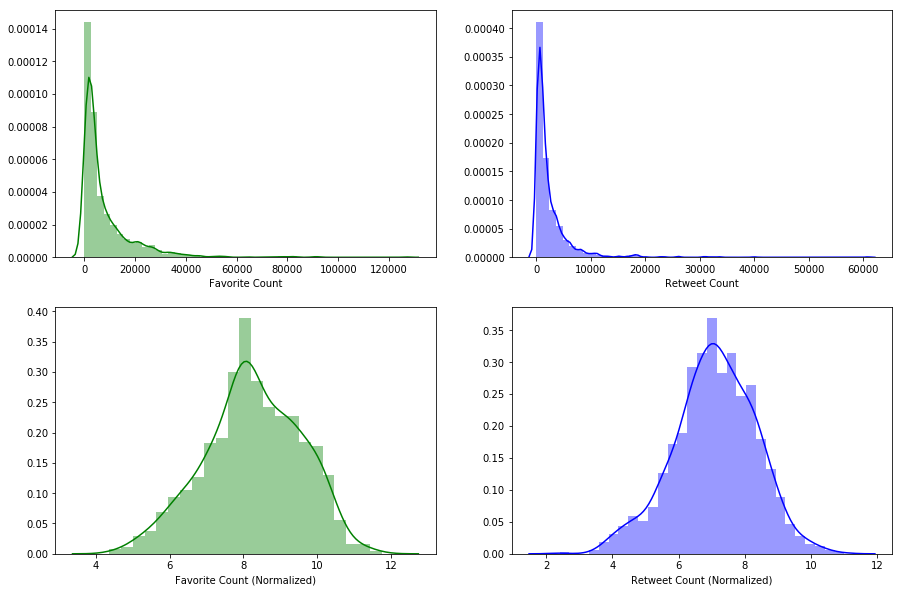

In [87]:
f, axes = plt.subplots(2,2,figsize=(15,10),sharex=False)

sns.distplot(df_master.favorite_count, color = 'green', ax=axes[0,0], axlabel='Favorite Count')
sns.distplot(df_master.retweet_count, color = 'blue', ax=axes[0,1], axlabel='Retweet Count')
sns.distplot(df_master.favorite_count.apply(np.log), color = 'green', ax=axes[1,0], axlabel='Favorite Count (Normalized)')
sns.distplot(df_master.retweet_count.apply(np.log), color = 'blue', ax=axes[1,1], axlabel='Retweet Count (Normalized)')

plt.show()

The original distributions for both favorites and retweets have long positive tails. Extremely popular tweets are extremely rare. The normalized graphs (the bottom two) again show similar distributions. They are outliers in favorite_count

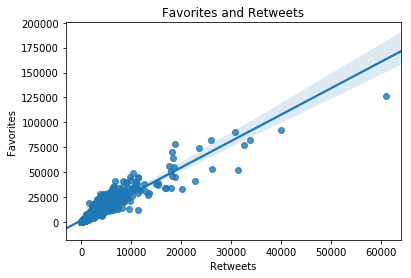

In [88]:
a = sns.regplot(x=df_master.retweet_count, y=df_master.favorite_count)
plt.title("Favorites and Retweets")
plt.xlabel('Retweets')
plt.ylabel('Favorites')
plt.show()

In [89]:
df_master.corr()

,rating_numerator,rating_denominator,favorite_count,retweet_count,img_num,p1_conf,p1_dog,p2_conf,p2_dog,p3_conf,p3_dog
rating_numerator,1.000000,0.174589,0.014909,0.021146,-0.004556,-0.014577,-0.045401,-0.025124,-0.052265,-0.008006,-0.042973
rating_denominator,0.174589,1.000000,-0.028941,-0.020518,-0.002304,-0.016881,-0.018615,-0.043476,-0.021320,-0.006521,0.005606
favorite_count,0.014909,-0.028941,1.000000,0.926029,0.132996,0.092475,0.073648,-0.007689,0.089462,-0.047036,0.048090
retweet_count,0.021146,-0.020518,0.926029,1.000000,0.109349,0.063866,0.011590,-0.014954,0.044646,-0.043374,0.003675
img_num,-0.004556,-0.002304,0.132996,0.109349,1.000000,0.178513,0.057752,-0.136132,0.063610,-0.108377,0.082595
p1_conf,-0.014577,-0.016881,0.092475,0.063866,0.178513,1.000000,0.142056,-0.503838,0.140092,-0.694795,0.140760
p1_dog,-0.045401,-0.018615,0.073648,0.011590,0.057752,0.142056,1.000000,0.095407,0.642041,0.040653,0.573609
p2_conf,-0.025124,-0.043476,-0.007689,-0.014954,-0.136132,-0.503838,0.095407,1.000000,0.092957,0.478169,0.045908
p2_dog,-0.052265,-0.021320,0.089462,0.044646,0.063610,0.140092,0.642041,0.092957,1.000000,0.032782,0.576241
p3_conf,-0.008006,-0.006521,-0.047036,-0.043374,-0.108377,-0.694795,0.040653,0.478169,0.032782,1.000000,0.023620


There is a strong relationship between retweet and favorite counts (0.72). As a tweet gains Favorites, one can expect to see Retweets to increase and vice versa. It looks like it may be a nonlinear relationship.